# OpenCV as an alternative to CNN

## Import libraries

In [1]:
#pip install opencv-python
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Library versions

These are the versions that will run the code with no problem.

In [2]:
!python --version

Python 3.7.6


In [4]:
cv2.__version__

'4.2.0'

In [5]:
np.__version__

'1.18.4'

In [6]:
pd.__version__

'1.0.1'

In [8]:
import matplotlib
matplotlib.__version__

'3.1.3'

## 1) Setup auxiliary function

We will be printing images a lot, so it makes sense to build a function that will help us out.

In [9]:
def plotImage(imgs, titles):
    '''
    Simple function to plot an array of images with a title all at once. You can even enhance this 
    by using subplots. It would be a nice touch but would overcomplicate the code, and this is not a core part of
    the presentation today.
    ------
    INPUT: Array of Images and Array of Titles.
    ------
    OUTPUT: Nothing
    ------
    '''
    
    for i, img in enumerate(imgs):
        plt.figure(figsize=(10,10)) #instantiate plot
        plt.imshow(img, cmap='gray') #display image with color mapping for gray scale
        plt.title(titles[i]) # give it a title, because we ALWAYS charts always need a title
        plt.axis('off') #It is an image, so X and Y ticks are not needed
        plt.show() #display
    return

In [10]:
img = cv2.imread('data/Mega Man.jpg') #Importing image as an object
img.shape #check image array dimension. It is a 3D array

(500, 500, 3)

## It is all about Matrixes

In [11]:
#Printing ALL element on first dimension, only first element on second and third dimension
print(img[:,255,0])

[181 181 181 181 181 181 181 181 181 181 182 182 182 182 181 181 182 181
 181 181 182 182 181 181 182 182 182 182 182 182 181 181 181 182 181 181
 182 181 181 181 181 181 181 181 181 182 181 182 181 181 181 182 181 181
 182 181 181 181 181 181 181 181 182 181 181 181 181 182 182 181 181 181
 181 182 182 182 181 181 181   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 181 181 181 181 182 181 182 181 182 181 181 181 182 181   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 181 181 181 181 181 182 182 182 181 181 181 181 181 181 180
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 181 182 182 181 181 182 182 181
 182 181 182 181 182 182 181   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 181 182 181 181 181 182 181 181 182 18

Let's importing the image once again, but without BGR dimentionality. 

And yes, OpenCV uses BGR and not RGB ¯\\_(ツ)_/¯

In [12]:
img = cv2.imread('data/Mega Man.jpg',0) #
img.shape # check image shape again. This time it is a 2D array

(500, 500)

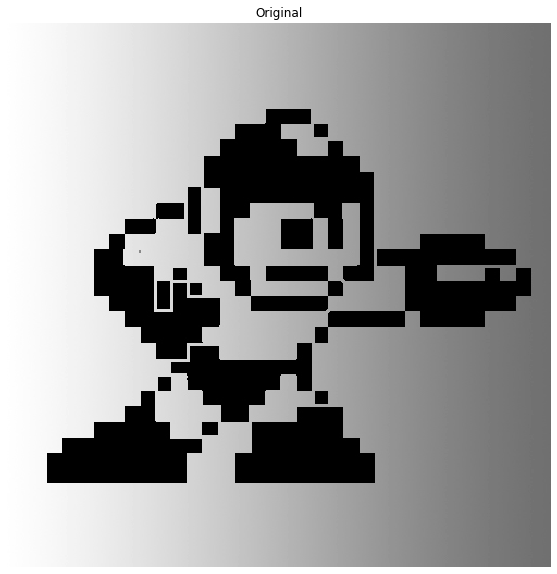

In [13]:
imgs = [img] #Remember that the function needs and array, even if it is a 1 element array.
titles = ['Original']

# Plot image
plotImage(imgs,titles)

## 2) Filters

### 2.1) Erosion


### Morphological transformations are simple operations based on the image shape. Erosion works like in real life. It expands the pixels to the areas surrounding it, according to the kernel format

In [14]:
kernel = np.ones((5,5),np.uint8) # Matrix that will pass through the image. In this case it is a "square"

In [15]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [16]:
erosion = cv2.erode(img,kernel,iterations = 1)

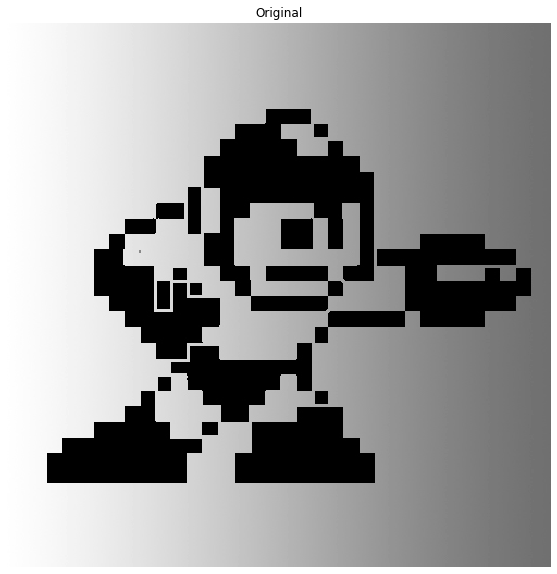

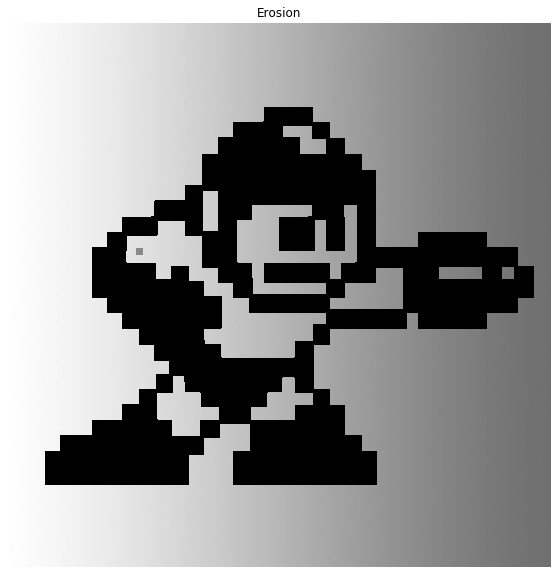

In [17]:
imgs = [img, erosion]
titles = ['Original', 'Erosion']

plotImage(imgs,titles)

### Let's crop the image to take a look at that anomaly on his shoulder

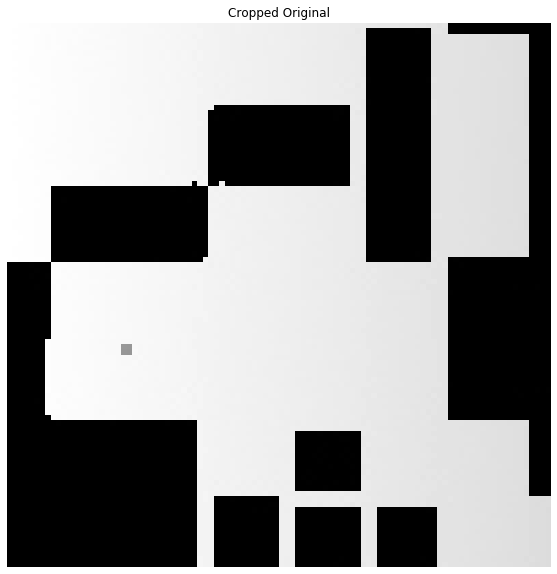

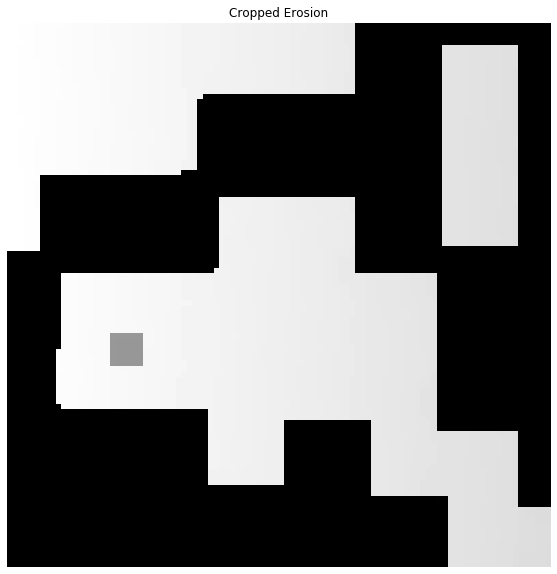

In [18]:
crop_img = img[150:250,100:200]
crop_erode = erosion[150:250,100:200]

imgs = [crop_img, crop_erode]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

### Let's try different Kernel shapes, first a diagonal line and then a ellipse/circle one 

In [19]:
kernel = np.array(np.identity(5), dtype='uint8')

In [20]:
kernel

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=uint8)

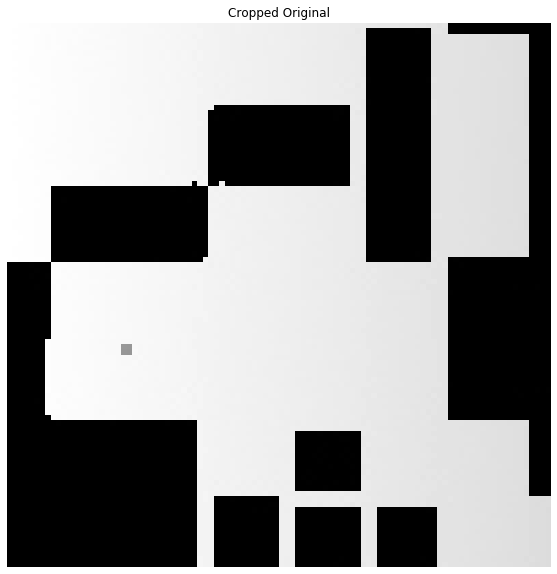

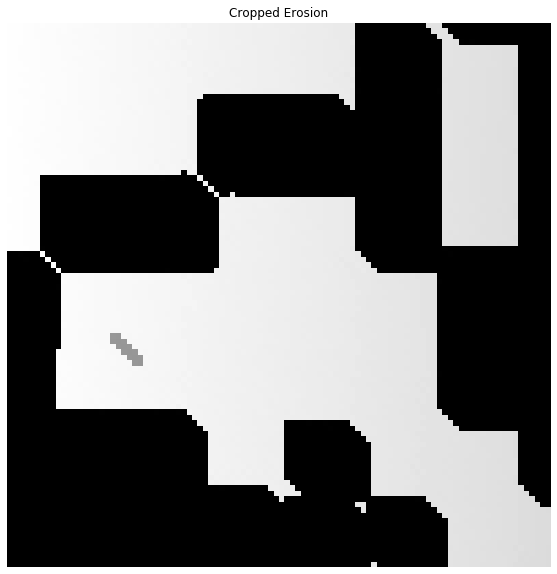

In [21]:
erosion = cv2.erode(img,kernel,iterations = 1)

crop_img = img[150:250,100:200]
crop_erode = erosion[150:250,100:200]

imgs = [crop_img, crop_erode]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,5))

In [23]:
kernel

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

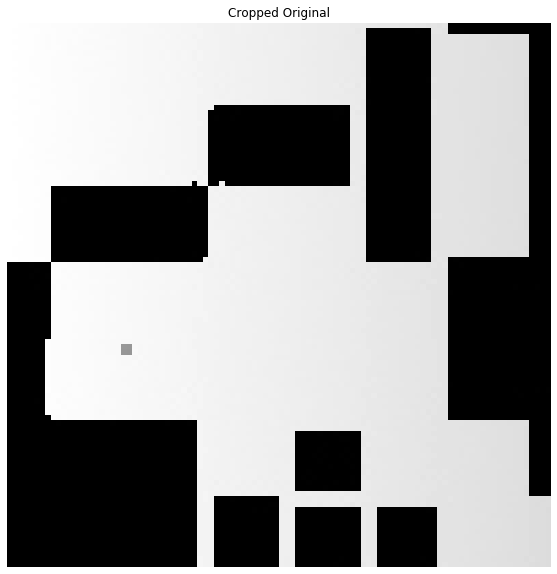

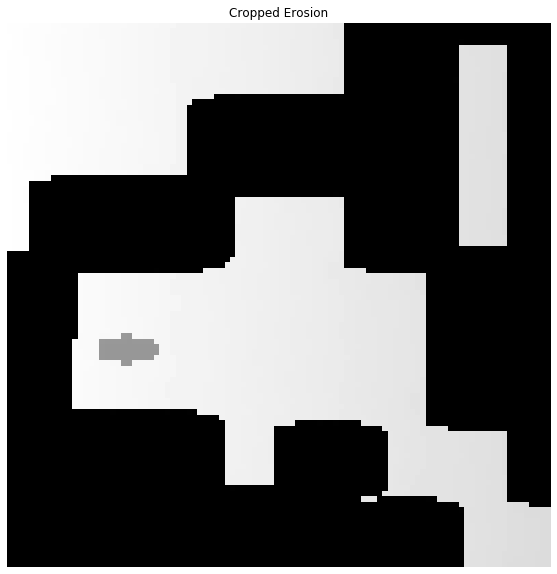

In [24]:
erosion = cv2.erode(img,kernel,iterations = 1)

crop_img = img[150:250,100:200]
crop_erode = erosion[150:250,100:200]

imgs = [crop_img, crop_erode]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

### 2.2) Dilation

### Basically the opposite of Erosion, which means it will retract the pixels according to the kernel

In [25]:
img = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

In [26]:
imgs = [img, dilation]
titles = ['Original', 'Dilation']

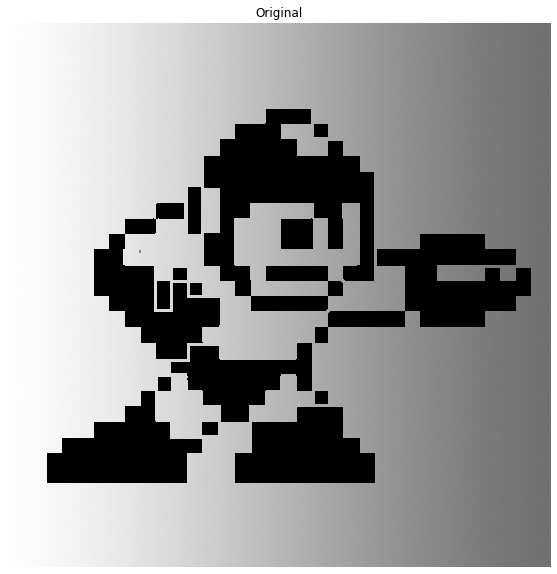

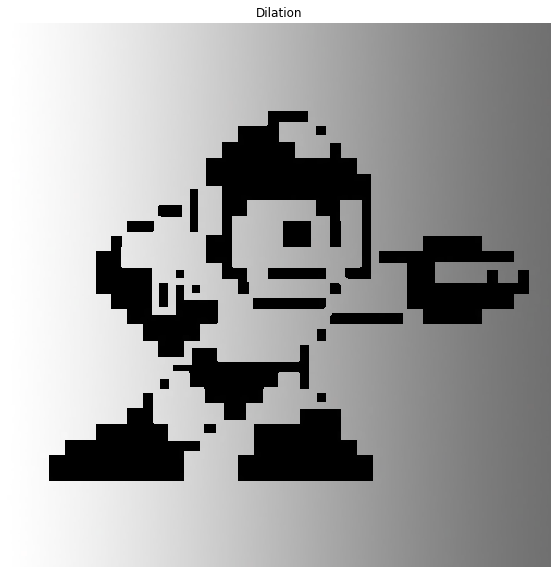

In [27]:
plotImage(imgs,titles)

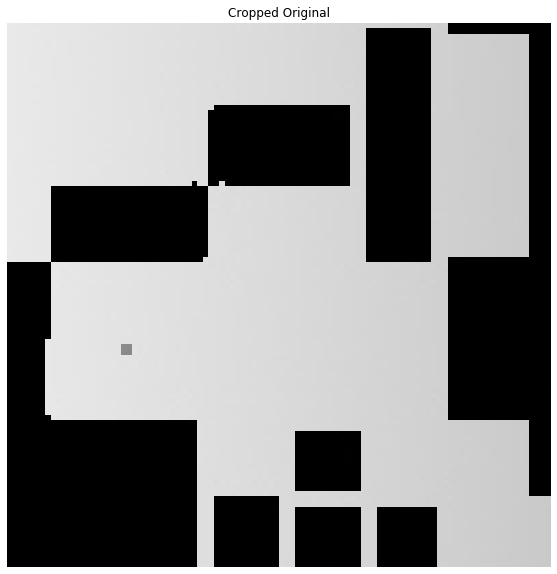

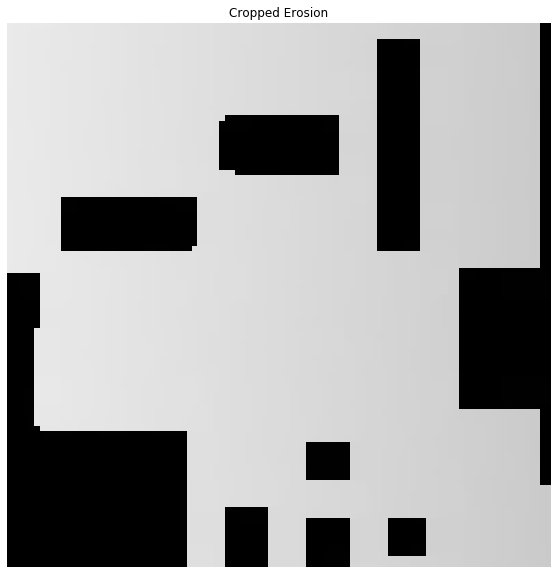

In [28]:
crop_img = img[150:250,100:200]
crop_dilate = dilation[150:250,100:200]

imgs = [crop_img, crop_dilate]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

In this case, it vanishes the anomally on his sholder. This is one of the techniques used for NOISE REDUCTION on photos, but there are more complex algorithm to do that

### <span style="color:red">Further reading:</span> There are two other basic transformations names Close and Open. Go check it out!!

### 2.3) Flip

In [29]:
img = cv2.imread('data/Mega Man.jpg')

flip_horizontal = cv2.flip(img,1)
flip_vertical = cv2.flip(img,0)
flip_both = cv2.flip(img,-1)

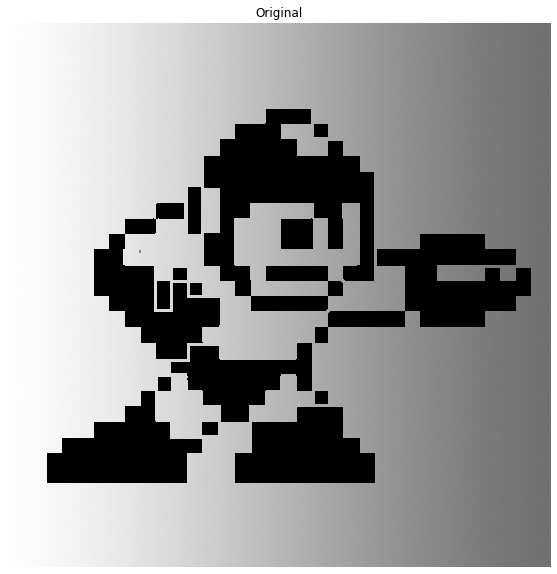

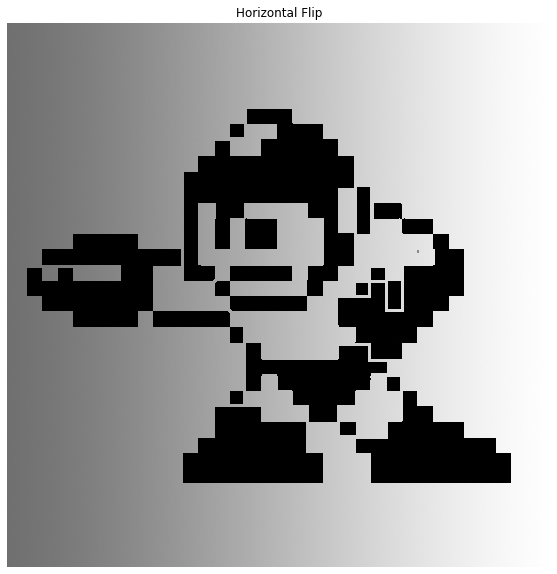

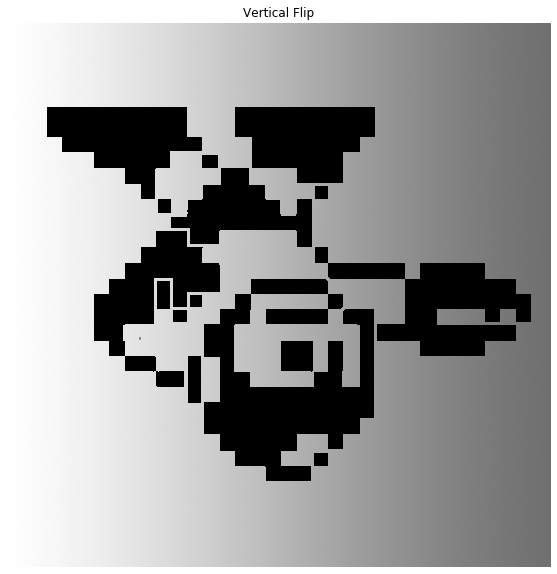

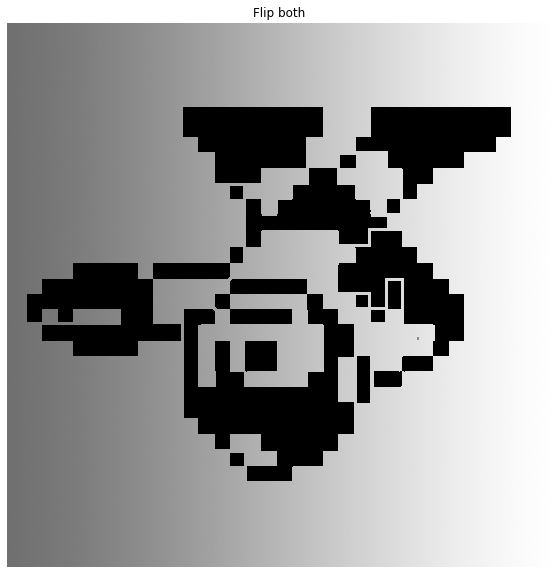

In [30]:
imgs = [img, flip_horizontal, flip_vertical, flip_both]
titles = ['Original', 'Horizontal Flip', 'Vertical Flip', 'Flip both']

plotImage(imgs,titles)

### 2.4) Morphology Ex

In [31]:
img = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)
morphologyEx = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

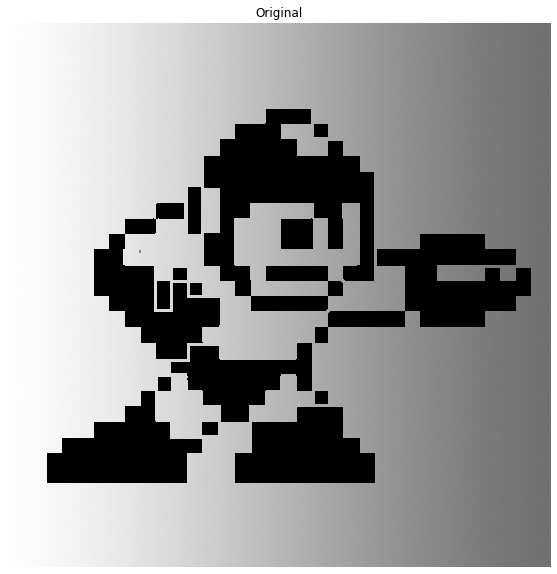

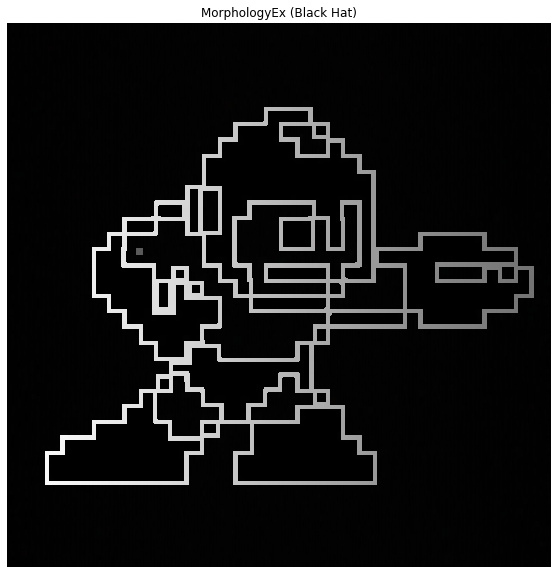

In [32]:
imgs = [img, morphologyEx]
titles = ['Original', 'MorphologyEx (Black Hat)']

plotImage(imgs,titles)

### 2.5) findContours

In [33]:
morphologyEx = morphologyEx[:,:,0]
img_color = cv2.imread('data/Mega Man.jpg')

### 2.5.1) Detecting Contours

In [34]:
contours, _ = cv2.findContours(morphologyEx, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1) #detecting contours. the second output on this function
                                                                                    #is hierarchy amoung countours, but we won't use them

# NOTE:
# CV2.RETR_TREE -> This is the Contour Retrieval Mode, in another words, this is how the hierarchy will be returned. 
# In this case "It retrieves all the contours and creates a full family hierarchy list"
# This is a good all around parameter, so I tend to always use it
# cv2.CHAIN_APPROX_TC89_L1 -> This is the Countour Approximation Algorithm. There are a few to play with. Again I usually use this one to get the job done

In [35]:
print(contours[0:1])

[array([[[497, 190]],

       [[497, 194]],

       [[499, 194]],

       [[499, 190]]], dtype=int32)]


### 2.5.2) Flatten the object

Contours is a list os lists, nested together. This is one way to make it into a 1D list

In [36]:
rects = [cv2.boundingRect(cnt) for cnt in contours] #Contours are nested objects, so let's use list comprehantion (or regular for..loop) to get a list

In [37]:
rects

[(497, 190, 3, 5),
 (0, 0, 500, 500),
 (490, 497, 1, 1),
 (17, 491, 1, 4),
 (11, 490, 1, 4),
 (454, 489, 1, 6),
 (85, 489, 1, 6),
 (5, 489, 1, 6),
 (494, 482, 4, 4),
 (489, 481, 3, 8),
 (444, 475, 1, 5),
 (3, 475, 3, 3),
 (10, 474, 1, 4),
 (483, 474, 4, 4),
 (478, 474, 3, 6),
 (52, 473, 1, 8),
 (43, 473, 1, 7),
 (473, 471, 1, 1),
 (474, 465, 1, 6),
 (2, 466, 4, 4),
 (38, 463, 1, 1),
 (17, 458, 1, 8),
 (490, 457, 1, 6),
 (471, 458, 4, 7),
 (33, 454, 1, 1),
 (5, 451, 1, 4),
 (463, 450, 1, 4),
 (11, 449, 1, 6),
 (17, 448, 1, 7),
 (424, 449, 1, 1),
 (22, 446, 1, 9),
 (494, 442, 3, 5),
 (484, 441, 1, 6),
 (478, 441, 1, 7),
 (52, 441, 1, 6),
 (17, 435, 1, 5),
 (484, 436, 1, 1),
 (467, 436, 1, 1),
 (496, 433, 1, 6),
 (483, 435, 1, 1),
 (11, 433, 1, 6),
 (458, 432, 1, 7),
 (41, 426, 4, 4),
 (490, 423, 1, 8),
 (2, 424, 6, 5),
 (21, 417, 5, 8),
 (463, 411, 1, 4),
 (4, 412, 1, 1),
 (484, 403, 1, 6),
 (478, 403, 1, 4),
 (496, 402, 1, 13),
 (445, 401, 1, 7),
 (21, 402, 4, 6),
 (17, 401, 1, 7),
 (47

### 2.5.3) Formatting the Contours and adding it back to the original image, as an easy way to display the result

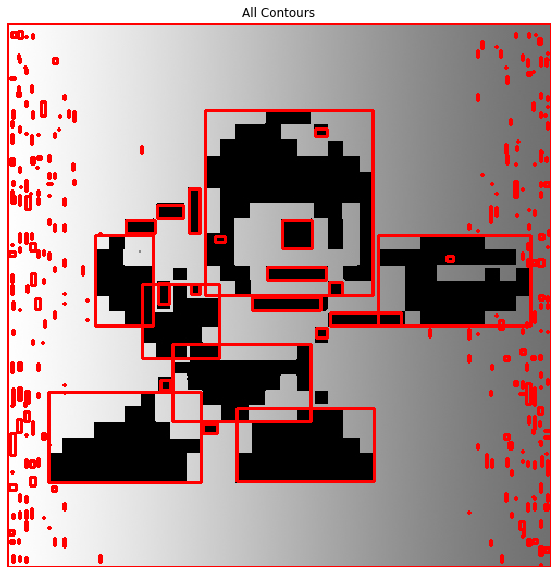

In [38]:
# Formating rectangles
color = (255, 0, 0) # line color
thickness = 2 # line thickness

for i, rect in enumerate(rects): #for each element

        x,y,w,h = rect #getting values
        start_point = (x, y) 
        end_point = (x+w, y+h) 

        img_all_contours = cv2.rectangle(img_color, start_point,end_point, color, thickness)  # adding rect to image
        
imgs = [img_all_contours]
titles = ['All Contours']
plotImage(imgs,titles)

### 2.5.4) Filtering out unwanted contours

But we only want to find specific Sizes and Shapes of anomallies. Here is one simple way to do that:

,x,y,w,h,area
2,490,497,1,1,1
8,494,482,4,4,16
11,3,475,3,3,9
13,483,474,4,4,16
17,473,471,1,1,1
...,...,...,...,...,...
273,496,33,1,1,1
277,496,27,1,1,1
280,449,21,1,1,1
284,17,12,1,1,1


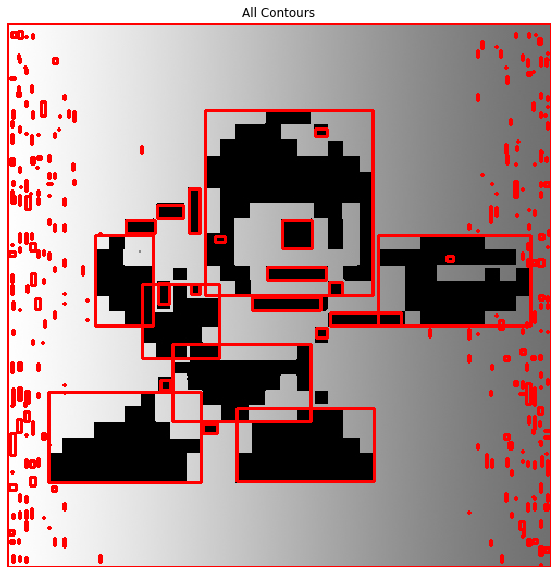

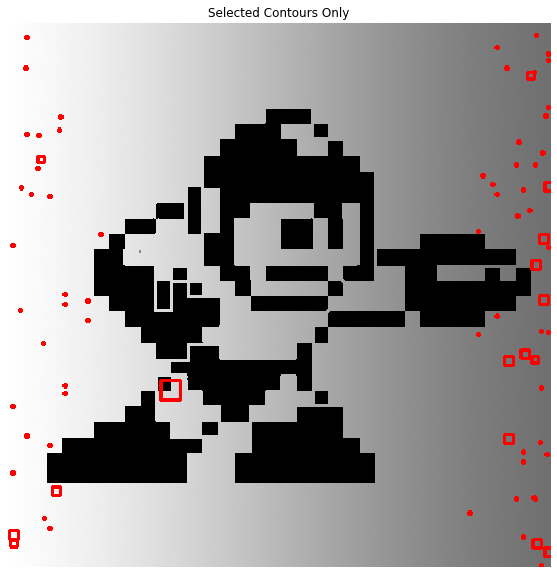

In [39]:
# Starting over
img = cv2.imread('data/Mega Man.jpg', 0) #image must be grayscale, in other words, 1 dimension
img_color = cv2.imread('data/Mega Man.jpg')


#Creating DataFrame from rects
df = pd.DataFrame(rects, columns=['x','y','w','h']) 
df['area'] = df['w']*df['h'] 

# Filtering DF
minsd = 0 #minimum size
maxsd = 0 #maximum size
mina = 0 #minimum area
maxa = 100 #maximum area

df = df[(abs((df['w'] - df['h'])) >= minsd ) 
     & (abs((df['w'] - df['h'])) <= maxsd )
     & (df['area'] > mina)
     & (df['area'] < maxa)].copy()   

display(df)

# Adding Squares only to the filtered artifacts
for i, rect in enumerate(df.values):
    color = (255, 0, 0) 
    thickness = 2

    x,y,w,h,area = rect

    start_point = (x, y) 
    end_point = (x+w*2, y+h*2) 

    img_selected_contours = cv2.rectangle(img_color, start_point,end_point, color, thickness) 

imgs = [img_all_contours, img_selected_contours]
titles = ['All Contours', 'Selected Contours Only']
plotImage(imgs,titles)

### That's better!!

## 3) Putting all together 

,x,y,w,h,area
416,119,207,7,7,49


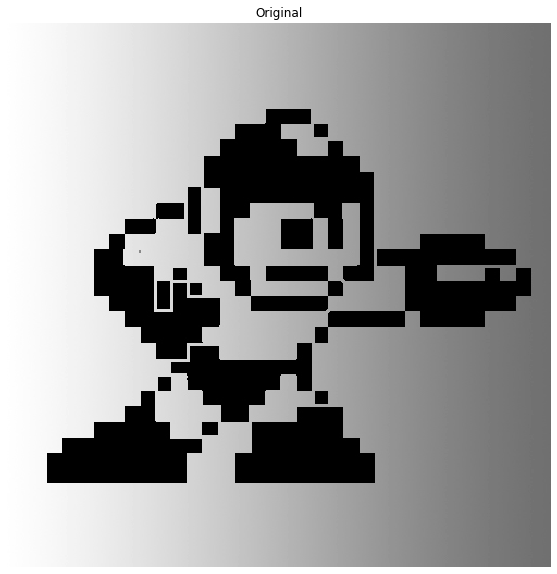

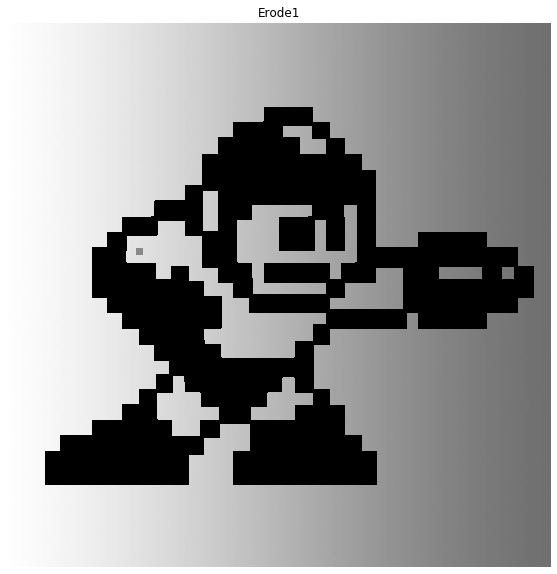

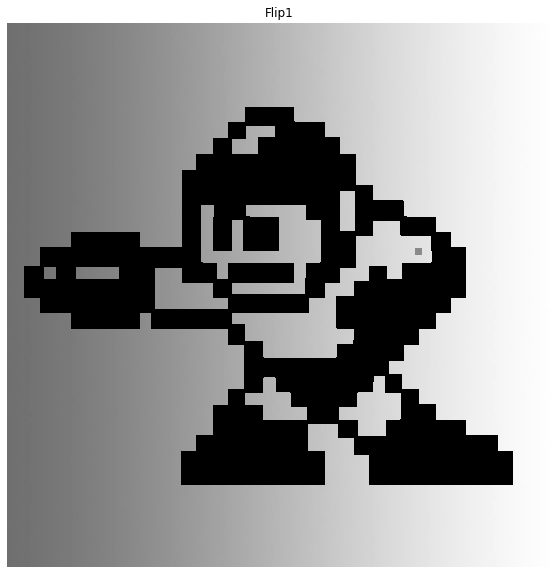

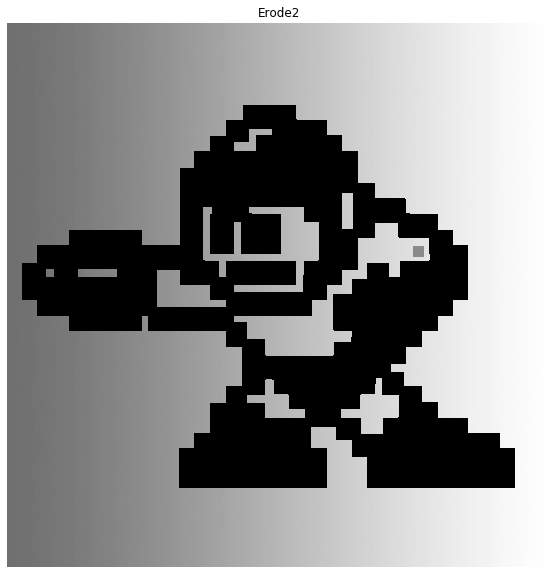

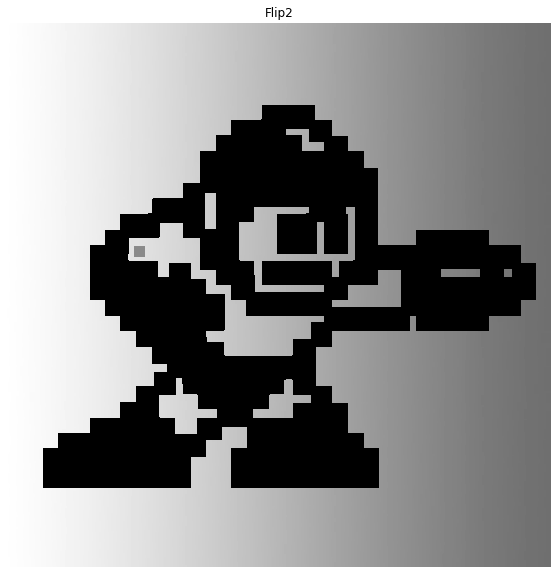

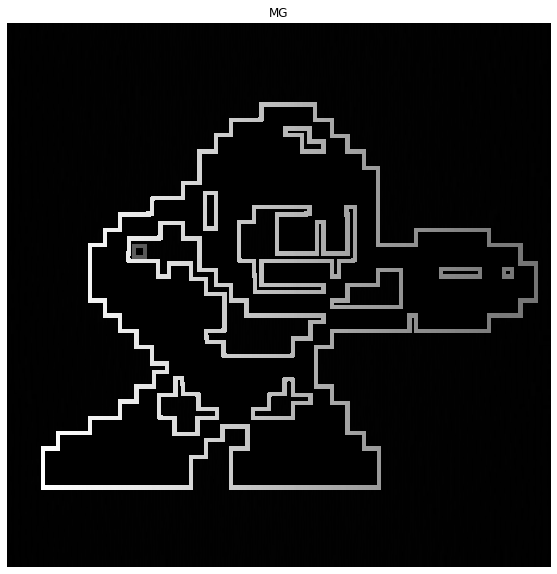

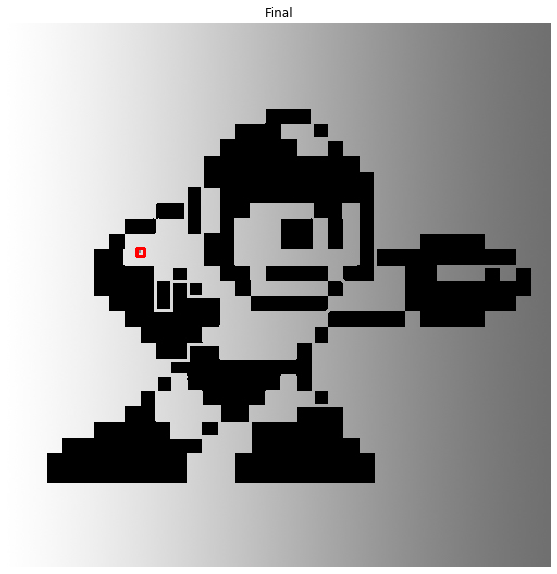

In [40]:
img = cv2.imread('data/Mega Man.jpg', 0)
img_color = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)

img1 = cv2.erode(img,kernel,iterations = 1)
img2 = cv2.flip(img1,1)                       #Flipping will not work here because kernel is square, but would work on other shapes
img3 = cv2.erode(img2,kernel,iterations = 1)
img4 = cv2.flip(img3,1)                       #Flipping back

img5 = cv2.morphologyEx(img4, cv2.MORPH_GRADIENT, kernel)

contours, _ = cv2.findContours(img5, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1) #detecting contours. the second output on this function
                                                                                    #is hierarchy amoung countours, but we won't use them

rects = [cv2.boundingRect(cnt) for cnt in contours] #Contours are nested objects, so let's use list comprehantion (or regular for..loop) to get a list

#Creating DataFrame from rects
df = pd.DataFrame(rects, columns=['x','y','w','h']) 
df['area'] = df['w']*df['h'] 

# Filtering DF
minsd = 0 #minimum size
maxsd = 0 #maximum size
mina = 40 #minimum area
maxa = 100 #maximum area

df = df[(abs((df['w'] - df['h'])) >= minsd ) 
     & (abs((df['w'] - df['h'])) <= maxsd )
     & (df['area'] > mina)
     & (df['area'] < maxa)].copy()   

display(df)

# Adding Squares only to the filtered artifacts

color = (255, 0, 0) 
thickness = 2
    
for i, rect in enumerate(df.values):
    x,y,w,h,area = rect

    start_point = (x, y) 
    end_point = (x+w, y+h) 

    img_final = cv2.rectangle(img_color, start_point,end_point, color, thickness) 


imgs = [img, img1, img2, img3, img4, img5, img_final]
titles = ['Original','Erode1','Flip1','Erode2','Flip2', 'MG', 'Final']

plotImage(imgs, titles)